# Cifar10 dataset calssfication

Topics covered in the notebook
- The basics of data loading and preparation
- Classification using the k-NN algorithm
- Classification using a Support Vector Machine (SVM)
- Calculation of metrics to assess the performance of your model




## Part 0. Dataset Preparation

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Divide the raw data into appropriate training and test sets for both the images and corresponding labels for use with the subsequent parts of the assignment.</li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [2]:
# Prepare your dataset here and display samples here.
import tensorflow as tf
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train_flatten = np.resize(x_train,(np.shape(x_train)[0],np.shape(x_train)[1]*np.shape(x_train)[2]*np.shape(x_train)[3]))
x_test_flatten = np.resize(x_test,(np.shape(x_test)[0],np.shape(x_test)[1]*np.shape(x_test)[2]*np.shape(x_test)[3]))

In [23]:
x_train[1].shape

(32, 32, 3)

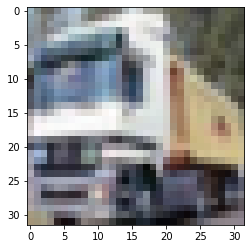

In [ ]:
plt.imshow(x_train[1] ,interpolation='nearest')

In [ ]:
class0 = np.where(y_train == 0)
class1 = np.where(y_train == 1)
class2 = np.where(y_train == 2)
class3 = np.where(y_train == 3)
class4 = np.where(y_train == 4)
class5 = np.where(y_train == 5)
class6 = np.where(y_train == 6)
class7 = np.where(y_train == 7)
class8 = np.where(y_train == 8)
class9 = np.where(y_train == 9)
classes = np.concatenate((np.reshape(class0[0],(1,5000)),np.reshape(class1[0],(1,5000)),np.reshape(class2[0],(1,5000)),np.reshape(class3[0],(1,5000)),np.reshape(class4[0],(1,5000)),np.reshape(class5[0],(1,5000)),np.reshape(class6[0],(1,5000)),np.reshape(class7[0],(1,5000)),np.reshape(class8[0],(1,5000)),np.reshape(class9[0],(1,5000))),axis=0)
np.shape(classes)

(10, 5000)

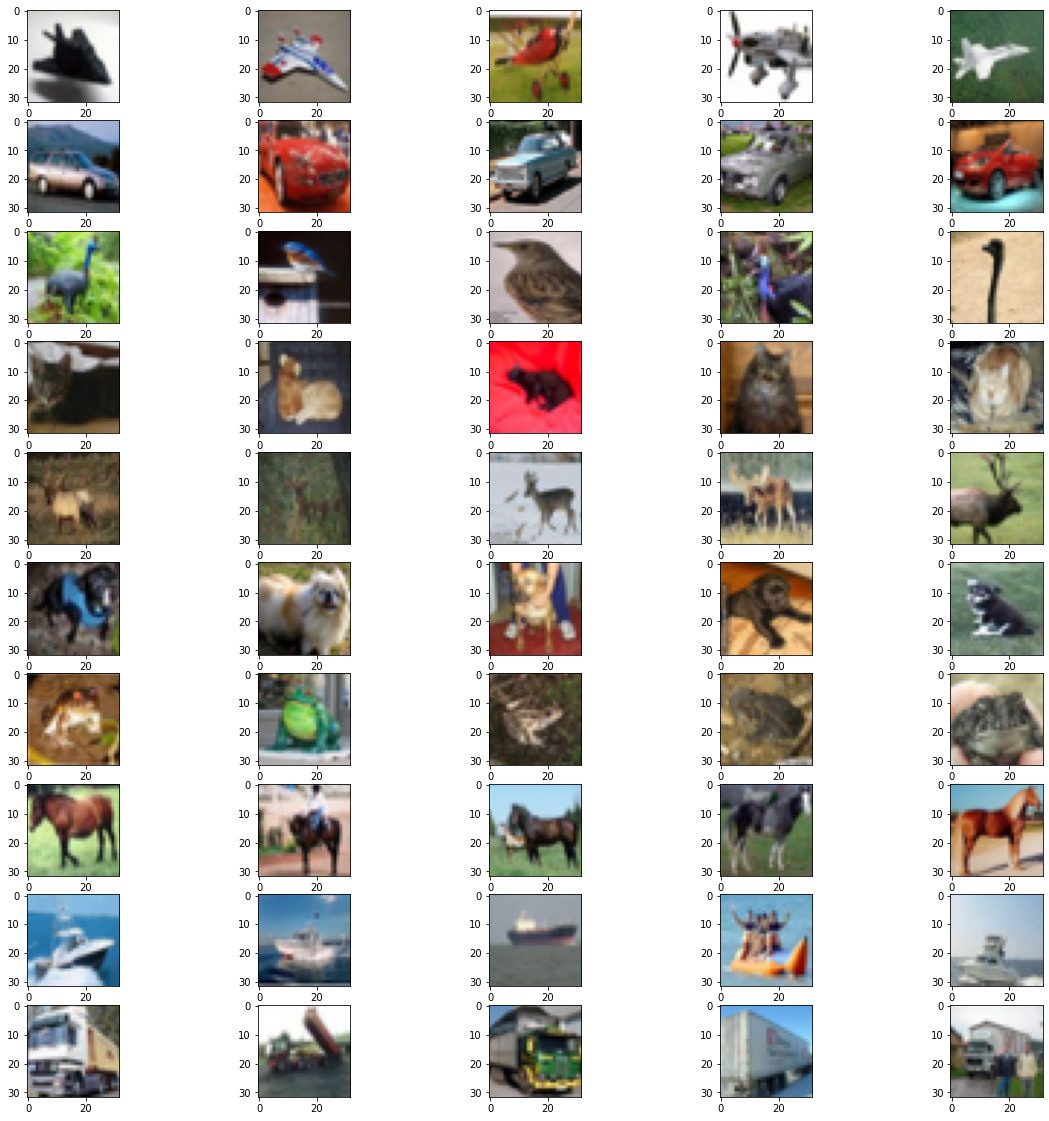

In [ ]:
fig, axarr = plt.subplots(10, 5, figsize=(20,20))

for i in range(10):
  for j in range(5):
    image = x_train[classes[i][j]]
    axarr[i,j].imshow(image)

## Part 1. k-NN Classifier (2 Marks)
For this section a simple kNN Classifier will be implement on the Cifar10 dataset. To do this the following steps will be preformed:
- Create a k-NN class. Your class must contain a method that returns predictions for your test set.
- Provide a suitable distance metric that you will use to calculate the nearest neightbours. You may choose the distance metric you believe is most suitable.
- Calculate the k nearest neighbours and make predictions.
- Choose the a value for _k_ that results in the highest accuracy on your test set. Show how you found this value.







In [ ]:
def euclidean_distance(x_test_dist, x_train_dist):
    return np.sqrt(np.sum(np.square(np.subtract(x_test_dist, x_train_dist))))

In [ ]:
# Write your KNN class here
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        #print(np.shape(X))

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        KNL = [self.y_train[i] for i in k_idx]
        KNL_list=list(np.transpose(KNL)[0])
        # return the most common class label
        most_common = Counter(KNL_list).most_common(1)
        return most_common[0][0]


In [ ]:
K = [1,3,5,7,9]
predictions =[]
for k in K:
  clf = KNN(k=k)
  clf.fit(x_train_flatten, y_train)
  predictions.append(clf.predict(x_test_flatten))
  print('At k = ',k)
  print("KNN classification accuracy", accuracy_score(predictions[-1],y_test))

At k =  3
KNN classification accuracy 0.2459
At k =  5
KNN classification accuracy 0.2406
At k =  7
KNN classification accuracy 0.2368
At k =  9
KNN classification accuracy 0.2389


Text(0.5, 1.0, 'k=3 confusion matrix')

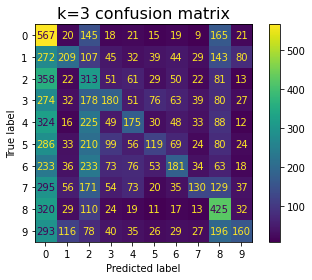

In [ ]:
cm_s =confusion_matrix(y_test, predictions[0])
disp_s = ConfusionMatrixDisplay(confusion_matrix=cm_s, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp_s.plot()
plt.title('k=3 confusion matrix', size=16)

Vectorized version

In [ ]:
def euclidean_distance(x_test_dist, x_train_dist):
    return (-2 * np.dot(x_test_dist, x_train_dist.T) + np.sum(x_train_dist**2,    axis=1) + np.sum(x_test_dist**2, axis=1)[:, np.newaxis])

In [ ]:
# Write your KNN class here
from collections import Counter


class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
      y_pred =[]
      distances = euclidean_distance(X.astype('float32'), (self.X_train).astype('float32'))
      # Sort by distance and return indices of the first k neighbors
      for i in range(np.shape(distances)[0]):
        k_idx = np.argsort(distances[i][:])[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        KNL = [self.y_train[i] for i in k_idx]
        KNL_list=list(np.transpose(KNL)[0])
        # return the most common class label
        most_common = Counter(KNL_list).most_common(1)
        y_pred.append(most_common[0][0])
      return np.array(y_pred)




In [ ]:
predictions =[]
accuracies_knn = []
for k in range(1,20):
  clf = KNN(k=k)
  clf.fit(x_train_flatten, y_train)
  predictions.append(clf.predict(x_test_flatten))
  print('At k = ',k)
  print("KNN classification accuracy", accuracy_score(predictions[-1],y_test))
  accuracies_knn.append(accuracy_score(predictions[-1],y_test))

At k =  1
KNN classification accuracy 0.3539
At k =  2
KNN classification accuracy 0.3539
At k =  3
KNN classification accuracy 0.356
At k =  4
KNN classification accuracy 0.353
At k =  5
KNN classification accuracy 0.3556
At k =  6
KNN classification accuracy 0.3555
At k =  7
KNN classification accuracy 0.3508
At k =  8
KNN classification accuracy 0.3542
At k =  9
KNN classification accuracy 0.3536
At k =  10
KNN classification accuracy 0.3467
At k =  11
KNN classification accuracy 0.3498
At k =  12
KNN classification accuracy 0.351
At k =  13
KNN classification accuracy 0.349
At k =  14
KNN classification accuracy 0.3488
At k =  15
KNN classification accuracy 0.3502
At k =  16
KNN classification accuracy 0.3465
At k =  17
KNN classification accuracy 0.35
At k =  18
KNN classification accuracy 0.3488
At k =  19
KNN classification accuracy 0.3454


C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_38376\1950152499.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


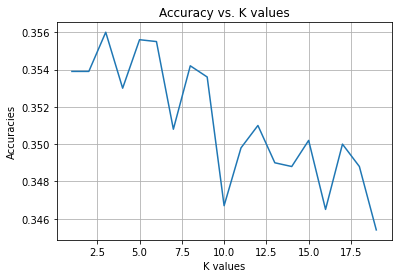

In [ ]:
plt.plot(list(range(1, 20)),accuracies_knn)
plt.grid(b=True)
plt.xlabel("K values")
plt.ylabel("Accuracies")
plt.title("Accuracy vs. K values")
plt.show()

Text(0.5, 1.0, 'k=3 confusion matrix')

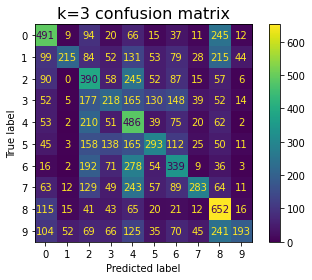

In [ ]:
cm_s =confusion_matrix(y_test, predictions[2])
disp_s = ConfusionMatrixDisplay(confusion_matrix=cm_s, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp_s.plot()
plt.title('k=3 confusion matrix', size=16)

### Discussion

**K value**\
The highest accuracy is at k=3 \
As observed from the graph the highest accuracy is at k = 3 and as the k increase the accuracy decreases as the model starts to under fit as it starts getting affected by noise and outliers and at lower values the accurcy decreases as the model tends to overfiit\
**Vectorization**\
The vectorization of the distance calculation has increased the speed of the model signfically and enabled trying more k values\



## Part 2. Logistic Regression 

For this section you will perform binary classification using logistic regression. Just as in Part 1. you will use the Cifar10 dataset, however to obtain a result for each class using logistic regression you will need to use a One-vs-Rest (OvR) approach to acheive multi-class classification.

Using ```LogisticRegression()``` in sklearn, write a function to execute the OvR strategy for the Cifar10 classes. Do not use the built-in ```OneVsResClassifier()``` method. You will need to follow these basic steps:
- Train a binary classifier for each class, where the target class is a "positive" results and the combination of the remaining classes are "negative". For Cifar10 you will need 10 models.
- For each test sample compute the probabilities for each model
- Select the argmax of the probabilities to obtain the predicted class

Collect your predictions from the test set and compute the accuracy score and plot a confusion matrix.

### class 0

In [ ]:
class0_labels=label_binarize(y_train, classes=[0])
class0_labels_true=label_binarize(y_test, classes=[0])
clf0 = LogisticRegression(random_state=0)
clf0.fit(x_train_flatten,class0_labels)
y_pred0 = clf0.predict(x_test_flatten)
y_prob0 = clf0.predict_proba(x_test_flatten)

C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("class0 classification accuracy", accuracy_score(y_pred0,class0_labels_true))

class0 classification accuracy 0.9


### class 1

In [ ]:
class1_labels=label_binarize(y_train, classes=[1])
class1_labels_true=label_binarize(y_test, classes=[1])
clf1 = LogisticRegression(random_state=0)
clf1.fit(x_train_flatten,class1_labels)
y_pred1 = clf1.predict(x_test_flatten)
y_prob1 = clf1.predict_proba(x_test_flatten)

C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("class1 classification accuracy", accuracy_score(y_pred1,class1_labels_true))

class1 classification accuracy 0.9112


### class 2

In [ ]:
class2_labels=label_binarize(y_train, classes=[2])
class2_labels_true=label_binarize(y_test, classes=[2])
clf2 = LogisticRegression(random_state=0)
clf2.fit(x_train_flatten,class2_labels)
y_pred2 = clf2.predict(x_test_flatten)
y_prob2 = clf2.predict_proba(x_test_flatten)

C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("class2 classification accuracy", accuracy_score(y_pred2,class2_labels_true))

class2 classification accuracy 0.895


### class 3

In [ ]:
class3_labels=label_binarize(y_train, classes=[3])
class3_labels_true=label_binarize(y_test, classes=[3])
clf3 = LogisticRegression(random_state=0)
clf3.fit(x_train_flatten,class3_labels)
y_pred3 = clf3.predict(x_test_flatten)
y_prob3 = clf3.predict_proba(x_test_flatten)

C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("class3 classification accuracy", accuracy_score(y_pred3,class3_labels_true))

class3 classification accuracy 0.8965


### class 4

In [ ]:
class4_labels=label_binarize(y_train, classes=[4])
class4_labels_true=label_binarize(y_test, classes=[4])
clf4 = LogisticRegression(random_state=0)
clf4.fit(x_train_flatten,class4_labels)
y_pred4 = clf4.predict(x_test_flatten)
y_prob4 = clf4.predict_proba(x_test_flatten)

C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("class4 classification accuracy", accuracy_score(y_pred4,class4_labels_true))

class4 classification accuracy 0.897


### class 5

In [ ]:
class5_labels=label_binarize(y_train, classes=[5])
class5_labels_true=label_binarize(y_test, classes=[5])
clf5 = LogisticRegression(random_state=0)
clf5.fit(x_train_flatten,class5_labels)
y_pred5 = clf5.predict(x_test_flatten)
y_prob5 = clf5.predict_proba(x_test_flatten)

C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("class5 classification accuracy", accuracy_score(y_pred5,class5_labels_true))

class5 classification accuracy 0.8947


### class 6

In [ ]:
class6_labels=label_binarize(y_train, classes=[6])
class6_labels_true=label_binarize(y_test, classes=[6])
clf6 = LogisticRegression(random_state=0)
clf6.fit(x_train_flatten,class6_labels)
y_pred6 = clf6.predict(x_test_flatten)
y_prob6 = clf6.predict_proba(x_test_flatten)

C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("class6 classification accuracy", accuracy_score(y_pred6,class6_labels_true))

class6 classification accuracy 0.9024


### class 7

In [ ]:
class7_labels=label_binarize(y_train, classes=[7])
class7_labels_true=label_binarize(y_test, classes=[7])
clf7 = LogisticRegression(random_state=0)
clf7.fit(x_train_flatten,class7_labels)
y_pred7 = clf7.predict(x_test_flatten)
y_prob7 = clf7.predict_proba(x_test_flatten)

C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("class7 classification accuracy", accuracy_score(y_pred7,class7_labels_true))

class7 classification accuracy 0.9055


### class 8

In [ ]:
class8_labels=label_binarize(y_train, classes=[8])
class8_labels_true=label_binarize(y_test, classes=[8])
clf8 = LogisticRegression(random_state=0)
clf8.fit(x_train_flatten,class8_labels)
y_pred8 = clf8.predict(x_test_flatten)
y_prob8 = clf8.predict_proba(x_test_flatten)

C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("class8 classification accuracy", accuracy_score(y_pred8,class8_labels_true))

class8 classification accuracy 0.8979


### class 9

In [ ]:
class9_labels=label_binarize(y_train, classes=[9])
class9_labels_true=label_binarize(y_test, classes=[9])
clf9 = LogisticRegression(random_state=0)
clf9.fit(x_train_flatten,class9_labels)
y_pred9 = clf9.predict(x_test_flatten)
y_prob9 = clf9.predict_proba(x_test_flatten)

C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("class9 classification accuracy", accuracy_score(y_pred9,class9_labels_true))

class9 classification accuracy 0.9011


### OVR

In [ ]:
# Write your logistic regression code here.
probs_ovr = np.hstack((y_prob0[:,1].reshape(np.shape(y_prob0)[0],1), y_prob1[:,1].reshape(np.shape(y_prob1)[0],1), y_prob2[:,1].reshape(np.shape(y_prob2)[0],1), y_prob3[:,1].reshape(np.shape(y_prob3)[0],1), y_prob4[:,1].reshape(np.shape(y_prob4)[0],1), y_prob5[:,1].reshape(np.shape(y_prob5)[0],1), y_prob6[:,1].reshape(np.shape(y_prob6)[0],1), y_prob7[:,1].reshape(np.shape(y_prob7)[0],1), y_prob8[:,1].reshape(np.shape(y_prob8)[0],1),y_prob9[:,1].reshape(np.shape(y_prob9)[0],1)))
y_pred_ovr=np.argmax(probs_ovr, axis=1)

In [ ]:
print("OVR classification accuracy", accuracy_score(y_pred_ovr,y_test))

OVR classification accuracy 0.3932


Text(0.5, 1.0, 'OVR confusion matrix')

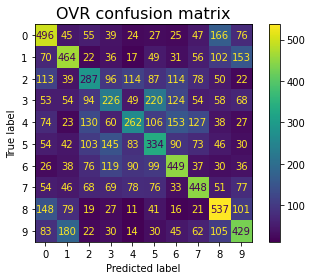

In [ ]:
cm_s =confusion_matrix(y_test, y_pred_ovr)
disp_s = ConfusionMatrixDisplay(confusion_matrix=cm_s, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp_s.plot()
plt.title('OVR confusion matrix', size=16)

## Part 3. Support Vector Machine (SVM) Classification 

In Part 3. Scikit-learn will be used to perform classification, again on the Cifar10 dataset. 

Create an SVM baseline using the <code>LinearSVC()</code> function. Make sure to use the primal solution and use "ovr" for multiclass Calculate the accuracy score for comparison.

Next you will explore the effect of the cost parameter on the accuracy.
    <ul>
    <li>Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]</li>
    <li>Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

Add a regularization term.
    <ul>
    <li>Rerun the above experiment, but this time use L1 regularization.</li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

For the final experiment you will use the ```SVC()``` function to run the classifer with a kernel.
    <ul>
    <li>Use a radial basis function when training a new model</li>
    <li>Find the optimal combination of values for the cost and gamma parameters. Use the following values in your loop:<br/>
        <div style="margin-left:40px"><code>
        for cost in [0.01, 0.1, 1, 10, 100]:<br/>
        &emsp;for gamma in [0.01, 0.1, 1, 10, 100]:
        </code></div>
    </li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>


Choose the model with the highest accuracy and plot the confusion matrix. In your discussion explain the results of your experiments and the reason for increased performance from the baseline (if any). Comment on the effect of the cost-paramenter and the L1 penalty on accuracy as well as any overfitting you observed. Discuss the confusion matrix of the model accuracy and provide some reasons for high-values found off the main diagonal.



In [ ]:
x_train_flatten_sampled = x_train_flatten[:15000]/255
y_train_sampled = y_train[:15000]
x_test_flatten_sampled = x_test_flatten[:1500]/255
y_test_sampled = y_test[:1500]

### Baseline

In [ ]:
# Run your SVM experiments here.
clf = LinearSVC(random_state=0)
clf.fit(x_train_flatten, y_train)
y_pred = clf.predict(x_test_flatten)

C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Linear SVC classification baseline accuracy", accuracy_score(y_pred,y_test))

Linear SVC classification baseline accuracy 0.144


sampled and normalization run

In [ ]:
# Run your SVM experiments here.
clf = LinearSVC(random_state=0,dual=False)
clf.fit(x_train_flatten_sampled, y_train_sampled)
y_pred_sampled = clf.predict(x_test_flatten_sampled)

C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Sampled Linear SVC classification baseline accuracy", accuracy_score(y_pred_sampled,y_test_sampled))

Sampled Linear SVC classification baseline accuracy 0.3233333333333333


### C values

In [ ]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
y_pred_c = []
c_acc = []
for c in C:
  clf = LinearSVC(random_state=0, C=c)
  clf.fit(x_train_flatten, y_train)
  y_pred_c.append(clf.predict(x_test_flatten))
  print("at c= ",c)
  print("Linear SVC classification accuracy", accuracy_score(y_pred_c[-1],y_test))
  c_acc.append(accuracy_score(y_pred_c[-1],y_test))

C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  0.0001
Linear SVC classification accuracy 0.2516


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  0.001
Linear SVC classification accuracy 0.2268


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  0.01
Linear SVC classification accuracy 0.2396


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  0.1
Linear SVC classification accuracy 0.2717


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  1
Linear SVC classification accuracy 0.144


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  10
Linear SVC classification accuracy 0.1921


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  100
Linear SVC classification accuracy 0.19


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  1000
Linear SVC classification accuracy 0.19


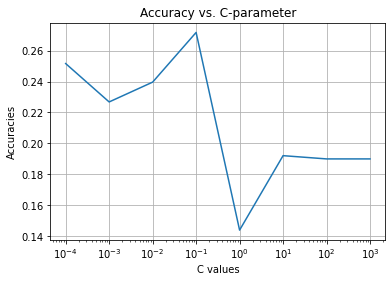

In [ ]:
plt.plot(C,c_acc)
plt.xscale("log")
plt.grid(b=True)
plt.xlabel("C values")
plt.ylabel("Accuracies")
plt.title("Accuracy vs. C-parameter")
plt.show()

sampled and normalization run

In [ ]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
y_pred_c_sampled = []
c_acc_sampled = []
for c in C:
  clf = LinearSVC(random_state=0, C=c, dual=False)
  clf.fit(x_train_flatten_sampled, y_train_sampled)
  y_pred_c_sampled.append(clf.predict(x_test_flatten_sampled))
  print("at c= ",c)
  print("Linear SVC classification accuracy", accuracy_score(y_pred_c_sampled[-1],y_test_sampled))
  c_acc_sampled.append(accuracy_score(y_pred_c_sampled[-1],y_test_sampled))

C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at c=  0.0001
Linear SVC classification accuracy 0.388


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at c=  0.001
Linear SVC classification accuracy 0.396


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at c=  0.01
Linear SVC classification accuracy 0.382


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at c=  0.1
Linear SVC classification accuracy 0.3453333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at c=  1
Linear SVC classification accuracy 0.3233333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at c=  10
Linear SVC classification accuracy 0.2826666666666667


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at c=  100
Linear SVC classification accuracy 0.266


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  1000
Linear SVC classification accuracy 0.254


C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_3548\2273399477.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


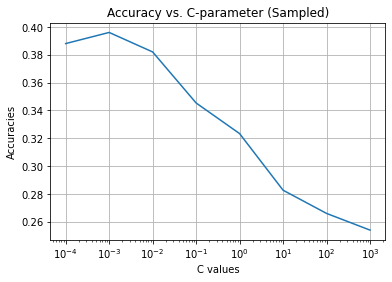

In [ ]:
plt.plot(C,c_acc_sampled)
plt.xscale("log")
plt.grid(b=True)
plt.xlabel("C values")
plt.ylabel("Accuracies")
plt.title("Accuracy vs. C-parameter (Sampled)")
plt.show()

Best model is at c = 0.001

### L1 regularization

In [ ]:
y_pred_c_l1 = []
c_l1_acc = []
for c in C:
  clf = LinearSVC(random_state=0, C=c, penalty='l1', dual=False)
  clf.fit(x_train_flatten, y_train)
  y_pred_c_l1.append(clf.predict(x_test_flatten))
  print("at c= ",c)
  print("Linear SVC classification accuracy with L1 regularization", accuracy_score(y_pred_c_l1[-1],y_test))
  c_l1_acc.append(accuracy_score(y_pred_c_l1[-1],y_test))

C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  0.0001
Linear SVC classification accuracy with L1 regularization 0.402


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  0.001
Linear SVC classification accuracy with L1 regularization 0.3958


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  0.01
Linear SVC classification accuracy with L1 regularization 0.3869


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  0.1
Linear SVC classification accuracy with L1 regularization 0.3866


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  1
Linear SVC classification accuracy with L1 regularization 0.3865


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  10
Linear SVC classification accuracy with L1 regularization 0.3865


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  100
Linear SVC classification accuracy with L1 regularization 0.3865


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  1000
Linear SVC classification accuracy with L1 regularization 0.3865


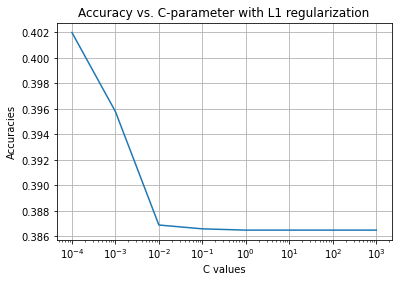

In [ ]:
plt.plot(C,c_l1_acc)
plt.xscale("log")
plt.grid(b=True)
plt.xlabel("C values")
plt.ylabel("Accuracies")
plt.title("Accuracy vs. C-parameter with L1 regularization")
plt.show()

sampled and normalization run

In [ ]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
y_pred_c_l1_sampled = []
c_l1_acc_sampled = []
for c in C:
  clf = LinearSVC(random_state=0, C=c, penalty='l1', dual=False)
  clf.fit(x_train_flatten_sampled, y_train_sampled)
  y_pred_c_l1_sampled.append(clf.predict(x_test_flatten_sampled))
  print("at c= ",c)
  print("Linear SVC classification accuracy with L1 regularization", accuracy_score(y_pred_c_l1_sampled[-1],y_test_sampled))
  c_l1_acc_sampled.append(accuracy_score(y_pred_c_l1_sampled[-1],y_test_sampled))

C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at c=  0.0001
Linear SVC classification accuracy with L1 regularization 0.09733333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at c=  0.001
Linear SVC classification accuracy with L1 regularization 0.21666666666666667


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at c=  0.01
Linear SVC classification accuracy with L1 regularization 0.37333333333333335


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at c=  0.1
Linear SVC classification accuracy with L1 regularization 0.39


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at c=  1
Linear SVC classification accuracy with L1 regularization 0.336


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  10
Linear SVC classification accuracy with L1 regularization 0.3293333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


at c=  100
Linear SVC classification accuracy with L1 regularization 0.328


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at c=  1000
Linear SVC classification accuracy with L1 regularization 0.3273333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_38376\2199698260.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


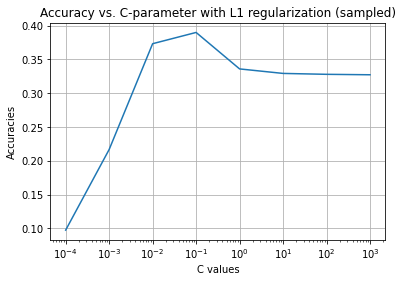

In [ ]:
plt.plot(C,c_l1_acc_sampled)
plt.xscale("log")
plt.grid(b=True)
plt.xlabel("C values")
plt.ylabel("Accuracies")
plt.title("Accuracy vs. C-parameter with L1 regularization (sampled)")
plt.show()

Best model is at c = 0.1

### SVC

In [ ]:
Cost = [0.01, 0.1, 1, 10, 100]
Gamma = [0.01, 0.1, 1, 10, 100]
y_pred_svc = []
for gamma in Gamma:
  print('at gamma = ', gamma)
  for cost in Cost:
    clf_svc = SVC(C=cost ,gamma=gamma)
    clf_svc.fit(x_train_flatten, y_train)
    y_pred_svc.append(clf_svc.predict(x_test_flatten))
    print("at cost = ",cost)
    print("SVC classification accuracy", accuracy_score(y_pred_svc[-1],y_test))


at gamma =  0.01


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  0.01
SVC classification accuracy 0.1


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  0.1
SVC classification accuracy 0.1


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  1
SVC classification accuracy 0.1


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  10
SVC classification accuracy 0.1


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  100
SVC classification accuracy 0.1
at gamma =  0.1


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  0.01
SVC classification accuracy 0.1


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  0.1
SVC classification accuracy 0.1


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


sampled and normalization run

In [ ]:
Cost = [0.01, 0.1, 1, 10, 100]
Gamma = [0.01, 0.1, 1, 10, 100]
y_pred_svc_sampled = []
for gamma in Gamma:
  print('at gamma = ', gamma)
  for cost in Cost:
    clf_svc = SVC(C=cost ,gamma=gamma)
    clf_svc.fit(x_train_flatten_sampled, y_train_sampled)
    y_pred_svc_sampled.append(clf_svc.predict(x_test_flatten_sampled))
    print("at cost = ",cost)
    print("SVC classification accuracy", accuracy_score(y_pred_svc_sampled[-1],y_test_sampled))

at gamma =  0.01


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  0.01
SVC classification accuracy 0.22733333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  0.1
SVC classification accuracy 0.3953333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  1
SVC classification accuracy 0.494


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  10
SVC classification accuracy 0.49333333333333335


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  100
SVC classification accuracy 0.49066666666666664
at gamma =  0.1


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  0.01
SVC classification accuracy 0.09733333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  0.1
SVC classification accuracy 0.09733333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  1
SVC classification accuracy 0.188


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  10
SVC classification accuracy 0.19866666666666666


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  100
SVC classification accuracy 0.19866666666666666
at gamma =  1


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  0.01
SVC classification accuracy 0.09733333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  0.1
SVC classification accuracy 0.09733333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  1
SVC classification accuracy 0.09733333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  10
SVC classification accuracy 0.09733333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  100
SVC classification accuracy 0.09733333333333333
at gamma =  10


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  0.01
SVC classification accuracy 0.09733333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  0.1
SVC classification accuracy 0.09733333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  1
SVC classification accuracy 0.09733333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  10
SVC classification accuracy 0.09733333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  100
SVC classification accuracy 0.09733333333333333
at gamma =  100


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  0.01
SVC classification accuracy 0.09733333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  0.1
SVC classification accuracy 0.09733333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  1
SVC classification accuracy 0.09733333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  10
SVC classification accuracy 0.09733333333333333


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


at cost =  100
SVC classification accuracy 0.09733333333333333


In [ ]:
svc_sampled_accuracies = np.zeros((5,5))
k = 0
for j in range(5):
  for i in range(5):
    svc_sampled_accuracies[j][i] = accuracy_score(y_pred_svc_sampled[k],y_test_sampled)
    k += 1
svc_sampled_accuracies

array([[0.22733333, 0.39533333, 0.494     , 0.49333333, 0.49066667],
       [0.09733333, 0.09733333, 0.188     , 0.19866667, 0.19866667],
       [0.09733333, 0.09733333, 0.09733333, 0.09733333, 0.09733333],
       [0.09733333, 0.09733333, 0.09733333, 0.09733333, 0.09733333],
       [0.09733333, 0.09733333, 0.09733333, 0.09733333, 0.09733333]])

C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_3548\2250510557.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


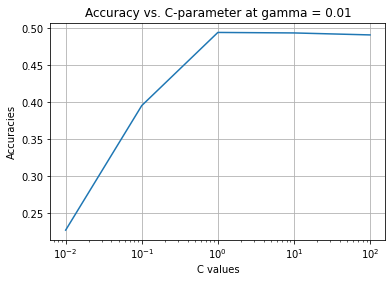

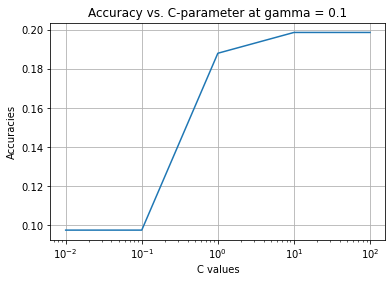

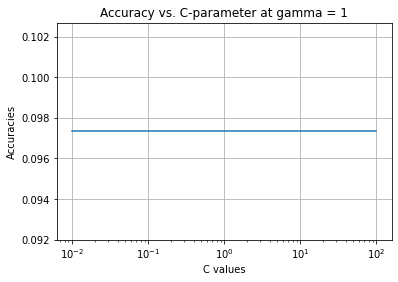

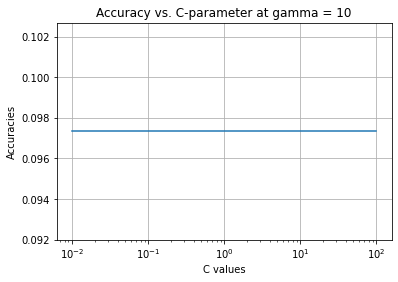

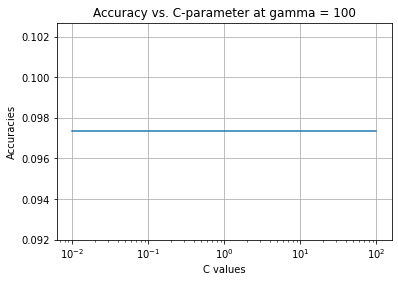

In [ ]:
for i in range(5):
  plt.plot(Cost,svc_sampled_accuracies[i][:])
  plt.xscale("log")
  plt.grid(b=True)
  plt.xlabel("C values")
  plt.ylabel("Accuracies")
  plt.title("Accuracy vs. C-parameter at gamma = "+str(Gamma[i]))
  plt.show()

In [ ]:
y_pred_svc_sampled[2]

array([3, 8, 8, ..., 8, 3, 9], dtype=uint8)

Text(0.5, 1.0, 'confusion matrix for cost=1 and gamma=0.01')

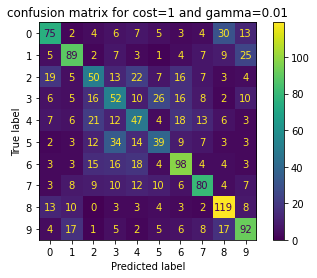

In [ ]:
cm_s =confusion_matrix(y_test_sampled, y_pred_svc_sampled[2])
disp_s = ConfusionMatrixDisplay(confusion_matrix=cm_s, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp_s.plot()
plt.title('confusion matrix for cost=1 and gamma=0.01')

Best model is at cost = 1 and gamma = 0.01

### Discussion

**Best model**\
The best model is SVC at cost = 1 and gamma =  0.01 as it gave the highest accuracy\
**C values**\
The C value control the width of the margin high C value means very narrow margin with high penalty on miscalssfication means that classfying each point is more important than the sepration off the classes which leads to overfit and that is also a reason that at high C values the model takes a lot of time to run, while a low value means a wide margin and a more general model which may lead also to under fitting that is why the model that gave best accurcies have medium values for C\
**Gamma values**\
the gamma values control the similarity radius as low gammas means high similarity radius which means more samples are clustred together as observed the model was able to acieve better results at lower gammas as the features are sparsed even after normaliztion and also that is why before normalization tha accuracy was very low and had the same value as to get high accuracy very low gamma value had to be used   
**Off digonal elements**\
As noticed from the confusion matrix that the elements that have more off digonals elements than others are\
*3 & 5* as they are classes of cats and dogs whom features are very similar\
*0 & 8* as they are classes of boats and planes and both have fronts nearly typical and their bodies are very similar\
*1 & 9* as they are classes of cars and trucks and they are both types of 4 wheeled vehicles and almost identical in their features compared ti other classes\
**Normalization**\
It can be noticed that the preformance of all the SVM models have improved signfically after nrmalization that shows that the numerical values of features is sparse that is why normalization is needed espically with SVM \
**L1 VS L2** \
It is observed that L1 and L2 has 2 oppsite graphs as L2 tends to overfit the model so low C value is more suitable to it as discussed low  C value tends to underfit the model on the other hand, L1 tends to underfit the model so it needs higher C values to balance it out


## Part 4. Writing a Conclusion 


**Best model**\
The best accuracy acquired was by SVC model at cost =1 and gamma =0.01 with accuracy 49.4% the second model is logistic regression with accuracy 39.32% and lastly KNN with accuracy 35.6%\
**KNN**\
KNN was not suitable to use as it suffers with high dimensionality as its main metric is distance which struggles with high dimensions and it also needs to itterate over the k to find the suitable value \

**Logistic regression**\
logistic regression is designed towards solving binary problems therefor OVR was used on the other hand it almost doesnot need tunning to reach a good accuracy \

**SVM** \
on the contrary of KNN SVM was designed to deal with high dimensional data and as observed in the confusion matrix it deals well easily seprated classes while suffers with similar classes also it needs a lot of time for parameters hypertunning \



Both logistic regression and SVM can deal well when there is a small amount of data wirh a lot of features while KNN cannot \
It is also observed that Linear SVM and Logistic regression output accuracies are  almost  identical accuracies 

<!-- Write your conclusion here -->